In [1]:
######################
#import useful modules
######################

import os,sys
#for netcdf files
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma # for masked arrays


#for plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['text.usetex']=False

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

######################

sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules/") 

from Modules import *
from Modules_gula import *

######################

%matplotlib inline

In [2]:

###############################################################################

time = 534 #eval(sys.argv[2])

case = 'search'

simul = load(simul = 'sismo_avg [650-500,1100+10,1789-5,1789+5,[1,100,1]] '+format(time))
simul_map = load(simul = 'sismo_avg',time=time)

###################################################################################

fifig = './Figures/' 

###################################################################################

[ny1,ny2,nx1,nx2]=simul.coord[:4]  
t = var('rho1',simul)

###############################################################################

depths=simul.coord[4]; it=0

[z_r,z_w] = tools.get_depths(simul)

if (ny2-ny1)<(nx2-nx1):
    x_direction=True
else:
    x_direction=False

if x_direction:
    it=0
    temp = var('temp',simul).data[:,(ny2-ny1)/2,:]
    salt = var('salt',simul).data[:,(ny2-ny1)/2,:]
    rho = t.data[:,(ny2-ny1)/2,:]+simul.rho0-1000  
    #hbls = var('hbls',simul, depths=depths).data[:,(ny2-ny1)/2]   
    #w = var('w',simul).data[:,(ny2-ny1)/2,:]
    u = tools.v2rho(var('v',simul).data)
    #uml = copy(u); 
    #for iz in range(u.shape[-1]): uml[:,:,iz][-hbls>depths[iz]]=np.nan
    u = u[:,(ny2-ny1)/2,:]# - tools.nanmean(uml)
    z = depths; x = np.arange(nx2-nx1)/simul.pm[:,(ny2-ny1)/2]/1e3   
    lon =  simul.x[:,(ny2-ny1)/2]
    lat =  simul.y[:,(ny2-ny1)/2]

else:
    it=1
    temp = var('temp',simul).data[(nx2-nx1)/2,:,:]
    salt = var('salt',simul).data[(nx2-nx1)/2,:,:]
    rho = t.data[(nx2-nx1)/2,:,:]+simul.rho0-1000       
    #hbls = var('hbls',simul, depths=depths).data[(nx2-nx1)/2,:]   
    #w = var('w',simul).data[(nx2-nx1)/2,:,:]
    u = tools.u2rho(var('u',simul).data)[(nx2-nx1)/2,:,:]
    
    #u = u - np.mean(u)
    z = depths; x = np.arange(ny2-ny1)/simul.pn[(nx2-nx1)/2,:]/1e3    
    lon =  simul.x[(nx2-nx1)/2,:]
    lat =  simul.y[(nx2-nx1)/2,:]
    
###############################################################################

mindepth=min(z)
x=x[::-1] #coast on the right

if mindepth<0:
    z = depths
    xz = x
else:
    [z_r,z_w] = tools.get_depths(simul)
    if x_direction: z = z_r[:,(ny2-ny1)/2,:]
    else: z = z_r[(nx2-nx1)/2,:,:]
    if x_direction: zw = z_w[:,(ny2-ny1)/2,:]
    else: zw = z_w[(nx2-nx1)/2,:,:]    
    del z_w
    xz = copy(z); xw= copy(zw)
    for iz in range(z.shape[1]): xz[:,iz]=x
    for iz in range(zw.shape[1]): xw[:,iz]=x

mindepth=np.nanmin(z)
#x = x.max()-x
#xz = xz.max()-xz
#xw = xw.max()-xw

###############################################################################

my_cmap=plot.ncview_colormap('blu_red')

cbarlabelsize = 6
fontsize0 = 12
fontsize1 = 16
fontsize2 = format(22)
fontsize3 = format(28)
font = {'size'   : fontsize1}
py.rc('font', **font)

    
###############################################################################
# DZT
###############################################################################

temp0 = var('temp',simul).data
dzt = (temp0[:,:,1:] - temp0[:,:,:-1]) / (z_r[:,:,1:] - z_r[:,:,:-1])
del temp0

#####

if x_direction:
    dzt = dzt[:,(ny2-ny1)/2,:]
else:
    dzt = dzt[(nx2-nx1)/2,:,:]


###############################################################################
# COMPUTE bvf
###############################################################################

if x_direction:
    bvf = var('bvf',simul).data[:,(ny2-ny1)/2,:] * 1e5
else:
    bvf = var('bvf',simul).data[(nx2-nx1)/2,:,:] * 1e5


###############################################################################
# COMPUTE VRT
###############################################################################

if x_direction:
    vrt = (var('vrt',simul).data[:,(ny2-ny1)/2,:].T/tools.rho2psi(simul.f)[:,(ny2-ny1)/2].T).T
else:
    vrt = (var('vrt',simul).data[(nx2-nx1)/2,:,:].T/tools.rho2psi(simul.f)[(nx2-nx1)/2,:].T).T


###############################################################################
# COMPUTE PV
###############################################################################

if x_direction:
    pv = var('pv',simul).data[:,(ny2-ny1)/2,:] 
else:
    pv = var('pv',simul).data[(nx2-nx1)/2,:,:]









simulname is None
args (['sismo_avg', '[650-500,1100+10,1789-5,1789+5,[1,100,1]]', '534'],)
args[0] ['sismo_avg', '[650-500,1100+10,1789-5,1789+5,[1,100,1]]', '534']
len(args[0]) 3
where is libra /net/libra/local/tmp/1/
time of simulation is: 534
coord
loading /net/krypton/data0/project/meddle/gula/ROMS/Simulations/SISMO/sismo_grd.nc
loading /net/krypton/data0/project/meddle/gula/ROMS/Simulations/SISMO/sismo_avg.00530.nc
get domain [650-500,1100+10,1789-5,1789+5,[1,100,1]] [650-
coordmax
loading /net/krypton/data0/project/meddle/gula/ROMS/Simulations/SISMO/sismo_grd.nc
loading /net/krypton/data0/project/meddle/gula/ROMS/Simulations/SISMO/sismo_avg.00530.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
dt
dt is read in  /net/krypton/data0/project/meddle/gula/ROMS/Simulations/SISMO/sismo_avg.00530.nc
[150, 1110, 1784, 1794, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  

In [3]:

import matplotlib.colors as col

cdict = {'red':   [(0.0,  0.2, 0.2),
                   (1.0,  1.0, 1.0)],

         'green': [(0.0,  0.2, 0.2),
                   (1.0,  1.0, 1.0)],

         'blue':  [(0.0,  0.2, 0.2),
                   (1.0, 1.0, 1.0)]}



my_grey = col.LinearSegmentedColormap('my_colormap',cdict,256)

/home/gula/.virtualenvs/roms/local/lib/python2.7/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/gula/.virtualenvs/roms/local/lib/python2.7/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


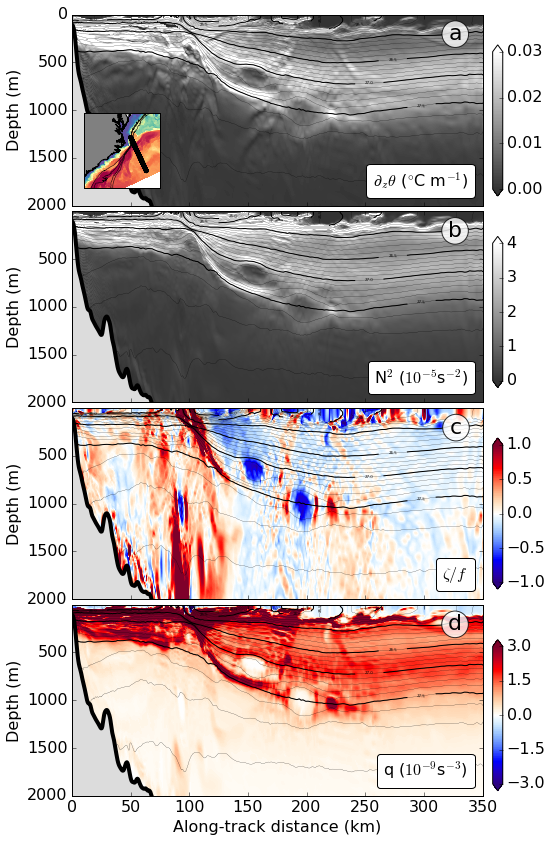

In [4]:
###############################################################################
plt.clf()

fig = py.figure(figsize=(7.0,14.0)) 

###############################################################################
scaleuv= 1.

def plot_uv(title=' ',quiverkey=0):
    #py.plot(x,-1*hbls,'--y',lw=1.5);
    CS2 = py.contour(xz,-z,rho,np.arange(0,100,0.5),colors = ('k',), linewidths = (1.,)); py.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=4)  
    CS2 = py.contour(xz,-z,rho,np.arange(0,100,0.1),colors = ('k',), linewidths = (0.2,)); 
    #CS3 = py.contour(xz,z,u,np.arange(0.5,10,0.5),colors = ('g',), linewidths = (1.,)); py.clabel(CS3, fmt = '%2.1f', colors = 'g', fontsize=4)
    py.plot(x,-z[:,0],'-k',lw=4.);
    #py.xlabel(r'$km$')
    #py.ylabel('z [m]')
    py.ylabel('Depth (m)')
    py.ylim([2000., 1.])
    py.xlim([0.,350.])
    py.title(title,fontsize=fontsize3,verticalalignment='bottom')


###############################################################################
# dzT
###############################################################################

#my_cmap=plot.ncview_colormap('bw')
my_cmap=my_grey
ax1 = fig.add_subplot(411,axisbg='Gainsboro')

levels = np.arange(-0.0,1.01,0.01) * 0.03
py.contourf(xz,-z,rho*0.,levels,extend='both',cmap=my_cmap);
#joe=py.contourf(tools.rho2u(xw),tools.rho2u(zw),pv,levels,extend='both',cmap=my_cmap);
joe=py.contourf(xw[:,1:-1],-zw[:,1:-1],dzt,levels,extend='both',cmap=my_cmap);
#joe = ax1.pcolormesh(xw[:,1:-1],zw[:,1:-1],ma.masked_invalid(dzt),vmin=levels.min(),vmax=levels.max(),cmap=my_cmap,rasterized=True)

plot_uv(' ',1); py.ylim([2000., 0.])
#ax1.yaxis.set_major_formatter( NullFormatter() ); py.ylabel(' ')
ax1.xaxis.set_major_formatter( NullFormatter() ); py.xlabel(' ')

varunit = r'$\partial_z \theta$ ($^{\circ}$C m$^{-1}$)'
at = AnchoredText(varunit,loc=4, prop=dict(size=fontsize1), frameon=True, )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)

box = 'circle,pad=0.15'; props = dict(boxstyle=box, fc='w', ec='k', lw=1, alpha=0.8)
ax1.text(.95,.95,'a', fontsize=fontsize2,  horizontalalignment='right', verticalalignment='top', bbox=props, transform=ax1.transAxes)

#axins1 = fig.add_axes([0.63, 0.75, .25, .01]) 
#plt.colorbar(joe,  cax=axins1,orientation='horizontal') 

#t1 = plt.text(1.05, 0.3,varunit,fontsize=fontsize1, rotation = 0
#              , horizontalalignment='center',verticalalignment='center',transform = ax1.transAxes)

####

cbar_ax = fig.add_axes([0.96, 0.72, 0.02, 0.15])
fig.colorbar(joe, cax=cbar_ax, ticks=np.arange(0,0.04,0.01))


###############################################################################
# N2
###############################################################################

#my_cmap=plot.ncview_colormap('bw')
my_cmap=my_grey
ax1 = fig.add_subplot(412,axisbg='Gainsboro')

levels = np.arange(-0.0,4.01,0.01) * 1.
py.contourf(xz,-z,rho*0.,levels,extend='both',cmap=my_cmap);
#joe=py.contourf(tools.rho2u(xw),tools.rho2u(zw),pv,levels,extend='both',cmap=my_cmap);
joe=py.contourf(xw,-zw,bvf,levels,extend='both',cmap=my_cmap);
#joe = ax1.pcolormesh(xw[:,1:-1],zw[:,1:-1],ma.masked_invalid(dzt),vmin=levels.min(),vmax=levels.max(),cmap=my_cmap,rasterized=True)

plot_uv(' ',1); #py.ylim([-2000., 0.])
#ax1.yaxis.set_major_formatter( NullFormatter() ); py.ylabel(' ')
ax1.xaxis.set_major_formatter( NullFormatter() ); py.xlabel(' ')

varunit = 'N$^2$ ($10^{-5}$s$^{-2}$)'
at = AnchoredText(varunit,loc=4, prop=dict(size=fontsize1), frameon=True, )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)

box = 'circle,pad=0.15'; props = dict(boxstyle=box, fc='w', ec='k', lw=1, alpha=0.8)
ax1.text(.95,.95,'b', fontsize=fontsize2,  horizontalalignment='right', verticalalignment='top', bbox=props, transform=ax1.transAxes)


#axins1 = fig.add_axes([0.63, 0.55, .25, .01]) 
#plt.colorbar(joe,  cax=axins1, orientation='horizontal') 

#t1 = plt.text(0.8, 0.3,varunit,fontsize=fontsize1, rotation = 0
#              , horizontalalignment='center',verticalalignment='center',transform = ax1.transAxes)


####

cbar_ax = fig.add_axes([0.96, 0.53, 0.02, 0.15])
fig.colorbar(joe, cax=cbar_ax, ticks=range(0,5,1))


###############################################################################
# Plot VRT
###############################################################################

ax2 = fig.add_subplot(413,axisbg='Gainsboro')

levels = np.arange(-1,1.01,0.01) * 1.
my_cmap=plot.ncview_colormap('blu_red')
py.contourf(xz,-z,rho*0.,levels,extend='both',cmap=my_cmap);
joe=ax2.contourf(tools.rho2u(xz),-tools.rho2u(z),vrt,levels,extend='both',cmap=my_cmap);
#joe = ax2.pcolormesh(tools.rho2u(xz),tools.rho2u(z),ma.masked_invalid(vrt),vmin=levels.min(),vmax=levels.max(),cmap=my_cmap,rasterized=True)

plot_uv(' ',1)
ax2.xaxis.set_major_formatter( NullFormatter() ); py.xlabel(' ')

varunit =  '$\zeta/f$'
at = AnchoredText(varunit,loc=4, prop=dict(size=fontsize1), frameon=True, )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at)

box = 'circle,pad=0.15'; props = dict(boxstyle=box, fc='w', ec='k', lw=1, alpha=0.8)
ax2.text(.95,.95,'c', fontsize=fontsize2,  horizontalalignment='right', verticalalignment='top', bbox=props, transform=ax2.transAxes)


#axins2 = fig.add_axes([0.63, 0.35, .25, .01]) 
#plt.colorbar(joe,  cax=axins2, ticks=[-1.,0.,1.],orientation='horizontal') 
#t1 = plt.text(1.2, 0.3,varunit,fontsize=fontsize1, rotation = 90
#              , horizontalalignment='right',verticalalignment='center',transform = ax2.transAxes)

###
cbar_ax = fig.add_axes([0.96, 0.33, 0.02, 0.15])
cb = fig.colorbar(joe, cax=cbar_ax,ticks=tools.clabels(levels))
####

###############################################################################
# Plot PV
###############################################################################

ax3 = fig.add_subplot(414,axisbg='Gainsboro')

levels = np.arange(-1,1.01,0.01) * 3.
my_cmap=plot.ncview_colormap('blu_red')
py.contourf(xz,-z,rho*0.,levels,extend='both',cmap=my_cmap);
joe = ax3.contourf(tools.rho2u(xw),-tools.rho2u(zw),pv*1e9,levels,extend='both',cmap=my_cmap);
#joe = ax3.pcolormesh(tools.rho2u(xw),tools.rho2u(zw),ma.masked_invalid(pv),vmin=levels.min(),vmax=levels.max(),cmap=my_cmap,rasterized=True)

plot_uv(' ',1); py.xlabel('Along-track distance (km)');

varunit =  'q ($10^{-9}$s$^{-3}$)'
at = AnchoredText(varunit,loc=4, prop=dict(size=fontsize1), frameon=True, )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax3.add_artist(at)

box = 'circle,pad=0.15'; props = dict(boxstyle=box, fc='w', ec='k', lw=1, alpha=0.8)
ax3.text(.95,.95,'d', fontsize=fontsize2,  horizontalalignment='right', verticalalignment='top', bbox=props, transform=ax3.transAxes)

#axins3 = fig.add_axes([0.63, 0.15, .25, .01]) 
#plt.colorbar(joe,  cax=axins3, ticks=[-3.,0.,3.],orientation='horizontal') 

#t1 = plt.text(1.2, 0.3,varunit,fontsize=fontsize1, rotation = 90
#              , horizontalalignment='left',verticalalignment='center',transform = ax3.transAxes)

###
#cb = fig.colorbar(joe,ticks=oldsim.clabels(levels),shrink=0.5)
cbar_ax = fig.add_axes([0.96, 0.13, 0.02, 0.15])
cb = fig.colorbar(joe, cax=cbar_ax,ticks=tools.clabels(levels))
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('left')
cb.update_ticks()
####

###################
# begin : map inset 

xc,yc,wi,hi  = 0.15,0.69,0.15,0.15
aa      = py.axes([xc,yc,wi,hi])


m1 = Basemap(projection='ortho',lat_0=np.mean(simul_map.y),lon_0=np.mean(simul_map.x),resolution='l')
coef = 0.5; width = (m1.urcrnrx - m1.llcrnrx)*coef; height = (m1.urcrnry - m1.llcrnry)*coef

m = Basemap(projection='lcc',lat_0=np.mean(simul_map.y)+.5,lon_0=np.mean(simul_map.x),\
            width=0.15*width,height=0.15*height,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='h',area_thresh=1000.,\
            lat_1=25.,lat_2=45.)      

#m = Basemap(projection='lcc',resolution='i',\
#            lon_0=np.mean(lon)-2,lat_0=np.mean(lat),\
#           width=1000e3,height=1000e3)

xr,yr   = m(simul_map.x,simul_map.y)

sst = var('temp',simul_map,depths=[0]).data

joe = m.contourf(xr,yr,ma.masked_invalid(sst),levels=np.arange(10.,25.1,0.1),cmap = 'Spectral_r',extend='both')
m.contour(xr,yr,simul_map.topo,levels=[200,600,1000,2000],linewidths=0.5,colors='k')

m.scatter(lon,lat,c = 'k',latlon=True,edgecolors='none'); 
m.drawcoastlines()
m.fillcontinents(color='Gray')

#cb = fig.colorbar(joe, ticks=range(5,30,2),shrink=0.5)
#cb.ax.tick_params(labelsize=4)

###############################################################################

py.subplots_adjust(hspace=0.03)
py.subplots_adjust(right=0.94)

###############################################################################

py.savefig(fifig + 'figure3.png',magnification='auto', dpi=300,bbox_inches='tight',transparence='true');
#py.savefig(fifig + 'figure3.pdf',dpi=300,bbox_inches='tight',transparence='true');

